### Analysis Conducted in This Notebook

1. **Selection of Job Websites**: Selected two job websites (workingnomads.com and jobs.com).
2. **Manual List of URLs**: Manually provided a list of URLs for job postings.
3. **Parsing Pages**: The parser extracts the most important information for the roles from each page.
4. **Extracting Top Skills**: Using spacy, top skills are extracted from the job descriptions.
5. **Generating Summaries**: Summaries are generated based on the TextRank algorithm.

In [3]:
!python -m spacy download ru_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 10.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('ru_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [5]:
import sys

sys.path.append('/content/gdrive/MyDrive/ML/projects/job-market-analysis')

In [6]:
from collections import Counter
import matplotlib.pyplot as plt

from utils import process_job_descriptions, extract_skills_from_files, concatenate_text_files, extract_summary, save_string_to_txt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#Analyze workingnomads.com jobs

In [7]:
wn_urls = ['https://www.workingnomads.com/jobs/data-engineering-specialist-data-lake-pismo',
 'https://www.workingnomads.com/jobs/senior-data-engineer-zencore-308145',
 'https://www.workingnomads.com/jobs/senior-data-engineer-goodnotes',
 'https://www.workingnomads.com/jobs/senior-data-engineer-python-healthcare-truelogic-software',
 'https://www.workingnomads.com/jobs/senior-data-engineer-coursera',
 'https://www.workingnomads.com/jobs/senior-data-engineer-phdata-335032',
 'https://www.workingnomads.com/jobs/senior-data-engineer-craftco-322212',
 'https://www.workingnomads.com/jobs/senior-data-engineer-spokeo-332029',
 'https://www.workingnomads.com/jobs/sr-big-data-engineer-gcp-airflow-and-oozie-rackspace',
 'https://www.workingnomads.com/jobs/data-engineer-venafi',
 'https://www.workingnomads.com/jobs/senior-data-engineer-data-insights-cloudbeds-312093',
 'https://www.workingnomads.com/jobs/senior-data-engineer-cobalt-331614',
 'https://www.workingnomads.com/jobs/scala-data-engineer-railroad19',
 'https://www.workingnomads.com/jobs/senior-data-engineer-veda-data-solutions-302114',
 'https://www.workingnomads.com/jobs/data-engineer-l5-netflix-313115',
 'https://www.workingnomads.com/jobs/job-opportunity-data-engineer-rackspace']

In [8]:
len(wn_urls)

16

In [9]:
start_keyword = "Get Free Job Alerts Log in"
end_keyword = "Working Nomads Post Jobs Premium Subscription"
description_directory = "/content/gdrive/MyDrive/ML/projects/job-market-analysis/wn/clean_descriptions"
summary_directory = "/content/gdrive/MyDrive/ML/projects/job-market-analysis/wn/summaries"
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
    'Accept-Language': 'en-US,en;q=0.5'
}

In [10]:
#process_job_descriptions(wn_urls, start_keyword, end_keyword, description_directory, summary_directory)

In [11]:
ls -l "/content/gdrive/MyDrive/ML/projects/job-market-analysis/wn/clean_descriptions" | grep "^-" | wc -l

16


In [12]:
ls -l "/content/gdrive/MyDrive/ML/projects/job-market-analysis/wn/summaries" | grep "^-" | wc -l

16


In [13]:
wn_skills = extract_skills_from_files(description_directory, ['ORG', 'PRODUCT', 'EVENT'])

In [14]:
len(wn_skills)

723

In [15]:
#remove general words
excluded_skills = ["Data", "Design", "Bookmark Report"]
wn_skills = [x for x in wn_skills if not x.islower() and all(skill not in x for skill in excluded_skills)]

#unify similar names
word_replacements = {"Clickhouse": "ClickHouse", "AirFlow": "Airflow", "Apache Airflow": "Airflow"}
wn_skills = [word_replacements.get(word, word) for word in wn_skills]

In [16]:
skill_counter = Counter(wn_skills)
top_skills = skill_counter.most_common(15)[::-1]
skills, counts = zip(*top_skills)

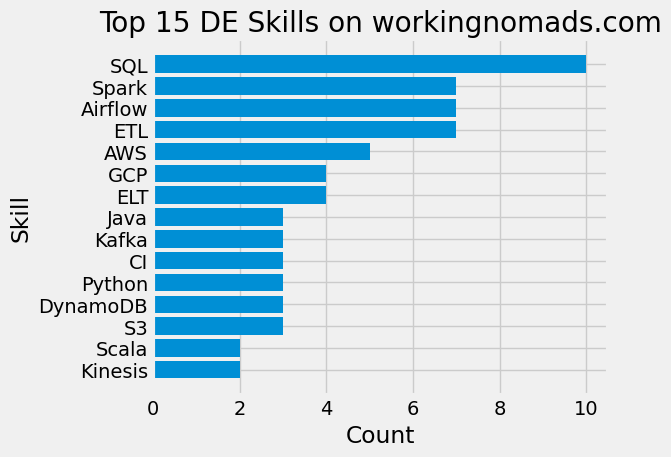

In [17]:
plt.style.use('fivethirtyeight')
plt.barh(skills, counts)
plt.xlabel('Count')
plt.ylabel('Skill')
plt.title('Top 15 DE Skills on workingnomads.com')
plt.tight_layout()
#plt.savefig('top_wn.png', dpi = 600)
plt.show()

In [18]:
wn_summaries = concatenate_text_files(summary_directory)

In [19]:
wn_summary = extract_summary(wn_summaries, 5)

In [20]:
wn_summary

'Basic Qualifications: 5+ years experience in data engineering with expertise in data architecture and pipelines Strong programming skills in Python and proficient with relational databases, data modeling, and SQL Experience with big data technologies (eg: Hive, Spark, Presto) Familiarity with batch and streaming architectures preferred Knowledgeable on data governance and compliance best practices Ability to communicate technical concepts clearly and concisely and independence and passion for innovation and learning new technologies Preferred Qualifications: Hands-on experience with some of: AWS, Databricks, Delta Lake, Airflow, DBT, Redshift, Datahub, Elementary If this opportunity interests you, you might like these courses on Coursera: Big Data Specialization Data Warehousing for Business Intelligence IBM Data Engineering Professional Certificate #LI-JP2 Apply for this position Bookmark Report About the job Full-time Canada 17 Applicants Posted 2 weeks ago python big data sql aws m

In [21]:
#save_string_to_txt("/content/gdrive/MyDrive/ML/projects/job-market-analysis/wn", "wn_summary", wn_summary)

#Analyze jobs.com jobs

In [22]:
jobscom_urls = ["https://www.jobs.com/en-us/jobs/data-engineer-plano-tx--d7e0ba2a-e3a1-4d2f-b21b-cb7ab9622f3e",
                "https://www.jobs.com/en-us/jobs/data-engineer-iii-johnston-ri--ef827263-5478-46f4-8ce1-2726b2421672",
                "https://www.jobs.com/en-us/jobs/senior-data-engineer-houston-tx--be44ced6-8d09-4f96-9b49-d9b68f6b98ca",
                "https://www.jobs.com/en-us/jobs/senior-data-engineer-dallas-tx--55835b5b-0bf1-470f-8954-10e6a2d63e0a",
                "https://www.jobs.com/en-us/jobs/senior-data-engineer-new-york-ny--ac2bb231-183a-41f7-99aa-f0c4b4e6c2dd",
                "https://www.jobs.com/en-us/jobs/data-engineer-tampa-fl--cf4061b5-102a-45ce-b14a-3a1af6efb095",
                "https://www.jobs.com/en-us/jobs/data-engineer-basking-ridge-nj--3665d6e9-38ec-4633-9818-a42aeca3107b",
                "https://www.jobs.com/en-us/jobs/lead-data-engineer-us-rdbu-boston-ma--e5d40b50-b3b0-4c2a-ad4c-f3d28a04830d",
                "https://www.jobs.com/en-us/jobs/data-engineer-r-d-informatics-monrovia-ca--4b4e3b96-88d9-4389-a191-9f44ec8cf4bb",
                "https://www.jobs.com/en-us/jobs/principal-data-engineer-hcp-data-platform-mettawa-il--8764d8cd-796c-4745-a94f-4eeda9cbb3c8",
                "https://www.jobs.com/en-us/jobs/senior-informatica-mdm-data-engineer-schaumburg-il--158078e8-52d6-40d7-b74e-338b4b5522f5",
                "https://www.jobs.com/en-us/jobs/founding-data-engineer-senior-role-cincinnati-oh--2eb208e6-2619-4b8b-8d63-6ddfa62fd6e5",
                "https://www.jobs.com/en-us/jobs/data-engineer-iv-menlo-park-ca--ec9c0704-488e-4df1-a7a8-1c94ef74a169",
                "https://www.jobs.com/en-us/jobs/data-engineer-cincinnati-oh--d545d924-1902-43ba-868c-3309b1ed3b6a",
                "https://www.jobs.com/en-us/jobs/data-engineer-minneapolis-mn--1303f8f3-1291-40d5-a79b-9ef6ac87d650",
                "https://www.jobs.com/en-us/jobs/senior-data-engineer-lake-forest-il--d4d3b5a3-8d5b-4f7f-97ef-afad9f2e6d58",
                "https://www.jobs.com/en-us/jobs/principal-data-engineer-boston-ma--70261d0f-263b-4e36-947b-d3e38bbdd500",
                "https://www.jobs.com/en-us/jobs/senior-data-engineering-developer-beachwood-oh--a856cff2-29c4-4063-8325-e0ba7898c942",
                "https://www.jobs.com/en-us/jobs/data-engineer-us-citizens-or-gc-holders-fl--7bda1439-9cc7-4f6f-ae3b-da09a954db6d"
             ]

In [23]:
len(jobscom_urls)

19

In [52]:
start_keyword = "Sign up Log in Post a Job See More Results"
end_keyword = "See More Results Apply"
description_directory = "/content/gdrive/MyDrive/ML/projects/job-market-analysis/jobscom/clean_descriptions"
summary_directory = "/content/gdrive/MyDrive/ML/projects/job-market-analysis/jobscom/summaries"
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
    'Accept-Language': 'en-US,en;q=0.5'
}

In [27]:
#process_job_descriptions(jobscom_urls, start_keyword, end_keyword, description_directory, summary_directory)

In [28]:
ls -l "/content/gdrive/MyDrive/ML/projects/job-market-analysis/jobscom/clean_descriptions" | grep "^-" | wc -l

19


In [29]:
ls -l "/content/gdrive/MyDrive/ML/projects/job-market-analysis/jobscom/summaries" | grep "^-" | wc -l

19


In [30]:
jobscom_skills = extract_skills_from_files(description_directory, ['ORG', 'PRODUCT', 'EVENT'])

In [31]:
len(jobscom_skills)

1036

In [40]:
#remove general words
excluded_skills = ["Data", "Bachelor", "AI", "TX", "Skills"]
jobscom_skills = [x for x in jobscom_skills if not x.islower() and all(skill not in x for skill in excluded_skills)]

#unify similar names
word_replacements = {"Clickhouse": "ClickHouse", "AirFlow": "Airflow", "Apache Airflow": "Airflow"}
jobscom_skills = [word_replacements.get(word, word) for word in jobscom_skills]

In [41]:
skill_counter = Counter(jobscom_skills)
top_skills = skill_counter.most_common(15)[::-1]
skills, counts = zip(*top_skills)

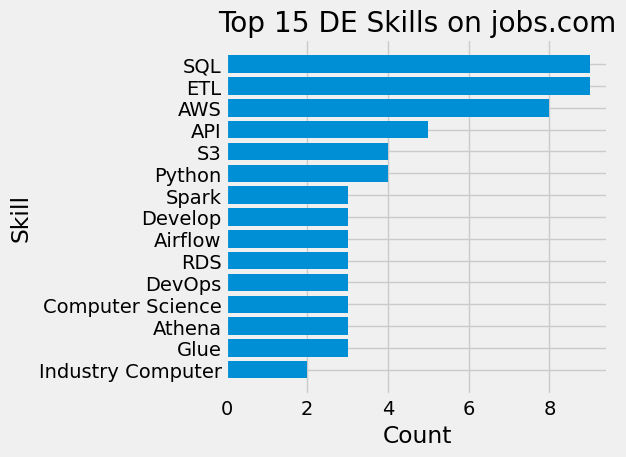

In [43]:
plt.style.use('fivethirtyeight')
plt.barh(skills, counts)
plt.xlabel('Count')
plt.ylabel('Skill')
plt.title('Top 15 DE Skills on jobs.com')
plt.tight_layout()
#plt.savefig('top_jobscom.png', dpi = 600)
plt.show()

In [53]:
jobscom_summaries = concatenate_text_files(summary_directory)

In [54]:
jobscom_summary = extract_summary(jobscom_summaries, 5)

In [55]:
jobscom_summary

"Move and Store Data: Data flow, infrastructure pipelines, ETL/ELT, structured and unstructured data movement and storage solutions Design data models and data flows into and out of Data Analytics databases Understand and design data relationships between business and data subject areas Follow standards for naming conventions, code documentation and code review Support data exploration and transformation needs: Conduct data cleansing and support other team members with data cleansing tasks as needed Conduct data profiling to identify data anomalies and resolve issues Execute data preparation tasks Identify, design, and implement internal process improvements: automating manual processes, optimizing data delivery, re-designing infrastructure for greater scalability, etc. Responsibilities: Build best in class analytics platform for our business teams to gain insights from our data Collaborate with Product owners, Analytics Lead, Scrum Master, and Development teams to build effective data

In [56]:
#save_string_to_txt("/content/gdrive/MyDrive/ML/projects/job-market-analysis/jobscom", "jobscom_summary", jobscom_summary)

Content successfully saved to /content/gdrive/MyDrive/ML/projects/job-market-analysis/jobscom/jobscom_summary.txt


#Worldwide Market

We will now merge the information from both websites and analyze the entire data.

In [46]:
ww_skills = wn_skills + jobscom_skills

In [47]:
len(ww_skills)

903

In [48]:
skill_counter = Counter(ww_skills)
top_skills = skill_counter.most_common(15)[::-1]
skills, counts = zip(*top_skills)

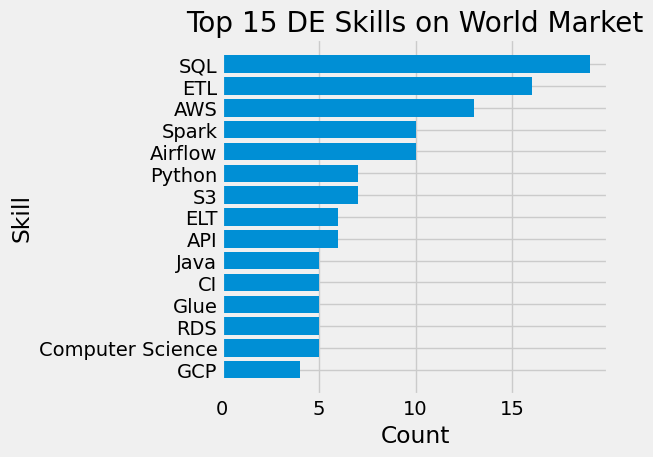

In [51]:
plt.style.use('fivethirtyeight')
plt.barh(skills, counts)
plt.xlabel('Count')
plt.ylabel('Skill')
plt.title('Top 15 DE Skills on World Market')
plt.tight_layout()
#plt.savefig('top_ww.png', dpi = 600)
plt.show()

In [57]:
ww_summaries = wn_summaries + ' ' + jobscom_summaries

In [58]:
ww_summary = extract_summary(ww_summaries, 5)

In [59]:
ww_summary

'Basic Qualifications: 5+ years experience in data engineering with expertise in data architecture and pipelines Strong programming skills in Python and proficient with relational databases, data modeling, and SQL Experience with big data technologies (eg: Hive, Spark, Presto) Familiarity with batch and streaming architectures preferred Knowledgeable on data governance and compliance best practices Ability to communicate technical concepts clearly and concisely and independence and passion for innovation and learning new technologies Preferred Qualifications: Hands-on experience with some of: AWS, Databricks, Delta Lake, Airflow, DBT, Redshift, Datahub, Elementary If this opportunity interests you, you might like these courses on Coursera: Big Data Specialization Data Warehousing for Business Intelligence IBM Data Engineering Professional Certificate #LI-JP2 Apply for this position Bookmark Report About the job Full-time Canada 17 Applicants Posted 2 weeks ago python big data sql aws m

In [60]:
#save_string_to_txt("/content/gdrive/MyDrive/ML/projects/job-market-analysis/summaries", "ww_summary", ww_summary)

Content successfully saved to /content/gdrive/MyDrive/ML/projects/job-market-analysis/summaries/ww_summary.txt


### Key Skills and Requirements for Data Engineering Roles on Worldwide Job Market

#### Programming Languages
- **Python**: Strong programming skills in Python are essential, with a focus on data processing and analysis. Python is widely used for scripting, automation, and developing data pipelines.
- **Java**: Experience in Java is beneficial, particularly for developing scalable and high-performance applications.

#### Databases and Query Languages
- **SQL**: Proficiency in SQL is critical, including writing complex queries, data modeling, and optimization. SQL is fundamental for working with relational databases.
- **Relational Databases**: Familiarity with relational databases such as RDS, PostgreSQL, and SQL Server is important for managing and querying structured data.

#### Big Data Technologies
- **Spark**: Expertise in Apache Spark for big data processing is highly valued. Spark is used for large-scale data processing and analytics.
- **Hadoop**: Understanding of the Hadoop ecosystem, including tools like Hive, is essential for managing and processing large datasets.

#### Data Pipelines and Workflow Orchestration
- **ETL (Extract, Transform, Load)**: Experience in designing, building, and maintaining ETL processes is crucial. This includes data extraction, transformation, and loading into data warehouses or lakes.
- **ELT (Extract, Load, Transform)**: Similar to ETL, but with the transformation step happening after loading the data.
- **Airflow**: Proficiency in Apache Airflow for scheduling and orchestrating complex data workflows is important.

#### Cloud Platforms and Services
- **AWS**: Hands-on experience with Amazon Web Services (AWS), including services like S3 for storage, Glue for ETL, and Redshift for data warehousing.
- **GCP**: Familiarity with Google Cloud Platform (GCP) is also beneficial for cloud-based data engineering tasks.
- **S3**: Knowledge of Amazon S3 for scalable storage solutions.

#### Data Warehousing
- **DWH (Data Warehouses)**: Understanding data warehousing concepts and experience with building and maintaining data warehouses is required.

#### Continuous Integration and Deployment
- **CI/CD**: Familiarity with continuous integration and continuous deployment (CI/CD) practices and tools is necessary for efficient software development and deployment.

#### Additional Skills
- **Data Governance and Compliance**: Knowledge of best practices in data governance and compliance to ensure data quality and security.
- **Communication and Problem-Solving**: Excellent problem-solving skills and the ability to communicate technical concepts clearly and concisely are essential.
- **Innovation and Learning**: A passion for innovation and continuous learning of new technologies is highly valued.

### Summary
Data engineering roles demand a blend of programming skills, proficiency in SQL, and expertise in managing and processing large datasets using big data technologies. Essential tools and platforms include Python, Java, Spark, Hadoop, Airflow, and cloud services like AWS and GCP. Additionally, a strong understanding of ETL/ELT processes, data warehousing, and continuous integration practices is required. Emphasis is placed on data governance, problem-solving abilities, and effective communication skills to support robust and scalable data infrastructure.